In [5]:
using CSV, DataFrames

In [105]:
romania = CSV.read("../data/romania.csv", DataFrame)

Row,Datetime,Latitude,Longitude,Depth,Magnitude
,DateTime,Float64,Float64,Float64,Float64
1,0984-01-01T00:00:00,45.7,26.6,150.0,7.1
2,1022-05-12T00:00:00,45.7,26.6,150.0,6.5
3,1038-08-15T00:00:00,45.7,26.6,150.0,7.3
4,1091-01-01T00:00:00,45.7,26.6,150.0,7.1
5,1107-02-12T03:00:00,45.7,26.6,150.0,7.1
6,1122-10-01T00:00:00,45.7,26.6,150.0,6.2
7,1126-08-08T00:00:00,45.7,26.6,150.0,7.1
8,1170-04-01T00:00:00,45.7,26.6,150.0,7.3
9,1196-02-13T07:00:00,45.7,26.6,150.0,7.5


## Exploratory Data Analysis

In [107]:
# Using describe function
# to get statistics of a dataset
describe(romania)
 

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Datetime,,0984-01-01T00:00:00,2012-06-22T05:15:00.500,2022-12-31T15:24:39.550,0,DateTime
2,Latitude,45.5935,43.5941,45.5989,48.23,0,Float64
3,Longitude,25.6016,20.1,26.4,29.84,0,Float64
4,Depth,38.4237,0.0,11.7,218.4,0,Float64
5,Magnitude,2.34114,0.0,2.2,7.9,0,Float64


In [108]:
# Using describe function to get
# statistics of a particular column in a dataset
describe(romania, :all, cols=:Magnitude)

Row,variable,mean,std,min,q25,median,q75,max,nunique,nuniqueall,nmissing,nnonmissing,first,last,eltype
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Nothing,Int64,Int64,Int64,Float64,Float64,DataType
1,Magnitude,2.34114,0.765894,0.0,1.9,2.2,2.7,7.9,,73,0,32628,7.1,2.1,Float64


In [109]:
using Plots

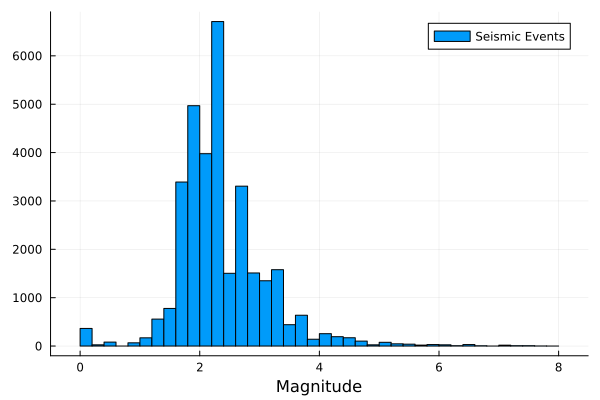

In [110]:
Plots.histogram(romania[:,:Magnitude],
                bins = 70, xlabel = "Magnitude", label="Seismic Events")

In [113]:
using StatsPlots

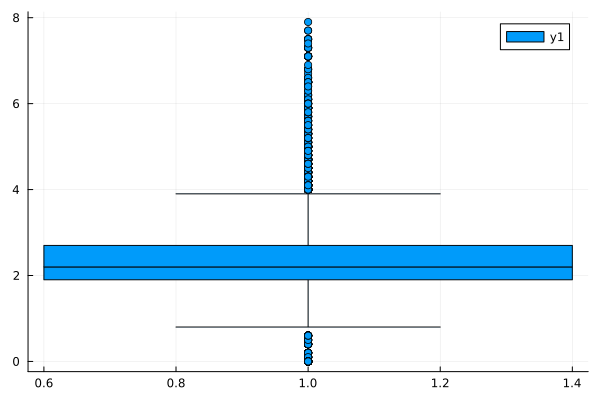

In [115]:
boxplot(romania[:,:Magnitude])

### Finding where to trim the data

In [132]:
function countmemb1(y)
    d = Dict{Int, Int}()
    for val in y
        if isnan(val)
            continue
        end
        if val in keys(d)
            d[val] += 1
        else
            d[val] = 1
        end
    end
    return d
end

countmemb1 (generic function with 1 method)

In [184]:
years=[]
for date in romania.Datetime
    push!(years, Dates.year(date))
end

events_per_year = countmemb1(years);

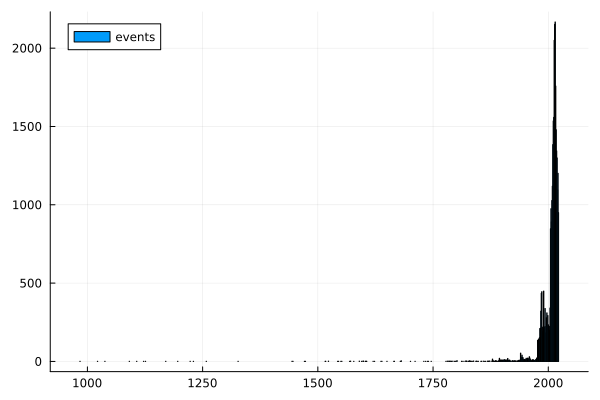

In [186]:
bar(collect(keys(events_per_year)), collect(values(events_per_year)), orientation=:vertical, label="events")

In [151]:
DateTime(1970,1,1,0,0,0)

1970-01-01T00:00:00

In [182]:
romania_trimmed = romania[romania.Datetime .> DateTime(1976,1,1,0,0,0),:];

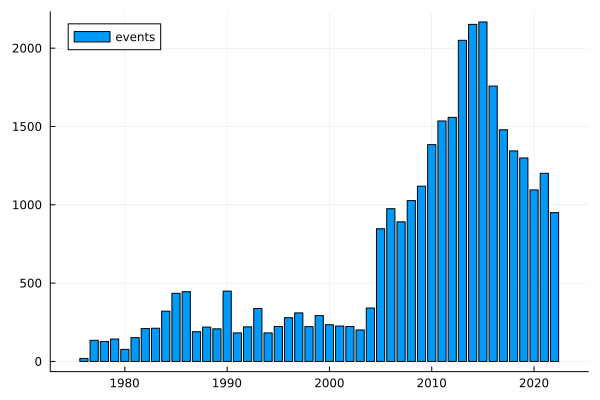

In [187]:
years=[]
for date in romania_trimmed.Datetime
    push!(years, Dates.year(date))
end

events_per_year = countmemb1(years)

bar(collect(keys(events_per_year)), collect(values(events_per_year)), orientation=:vertical, label="events")